## 情感分析项目

本项目的目标是基于用户提供的评论，通过算法自动去判断其评论是正面的还是负面的情感。比如给定一个用户的评论：
- 评论1： “我特别喜欢这个电器，我已经用了3个月，一点问题都没有！”
- 评论2： “我从这家淘宝店卖的东西不到一周就开始坏掉了，强烈建议不要买，真实浪费钱”

对于这两个评论，第一个明显是正面的，第二个是负面的。 我们希望搭建一个AI算法能够自动帮我们识别出评论是正面还是负面。

情感分析的应用场景非常丰富，也是NLP技术在不同场景中落地的典范。比如对于一个证券领域，作为股民，其实比较关注舆论的变化，这个时候如果能有一个AI算法自动给网络上的舆论做正负面判断，然后把所有相关的结论再整合，这样我们可以根据这些大众的舆论，辅助做买卖的决策。 另外，在电商领域评论无处不在，而且评论已经成为影响用户购买决策的非常重要的因素，所以如果AI系统能够自动分析其情感，则后续可以做很多有意思的应用。 

情感分析是文本处理领域经典的问题。整个系统一般会包括几个模块：
- 数据的抓取： 通过爬虫的技术去网络抓取相关文本数据
- 数据的清洗/预处理：在本文中一般需要去掉无用的信息，比如各种标签（HTML标签），标点符号，停用词等等
- 把文本信息转换成向量： 这也成为特征工程，文本本身是不能作为模型的输入，只有数字（比如向量）才能成为模型的输入。所以进入模型之前，任何的信号都需要转换成模型可识别的数字信号（数字，向量，矩阵，张量...)
- 选择合适的模型以及合适的评估方法。 对于情感分析来说，这是二分类问题（或者三分类：正面，负面，中性），所以需要采用分类算法比如逻辑回归，朴素贝叶斯，神经网络，SVM等等。另外，我们需要选择合适的评估方法，比如对于一个应用，我们是关注准确率呢，还是关注召回率呢？ 

在本次项目中，我们已经给定了训练数据和测试数据，它们分别是 ``train.positive.txt``, ``train.negative.txt``， ``test_combined.txt``. 请注意训练数据和测试数据的格式不一样，详情请见文件内容。 整个项目你需要完成以下步骤：

数据的读取以及清洗： 从给定的.txt中读取内容，并做一些数据清洗，这里需要做几个工作： 
- （1） 文本的读取，需要把字符串内容读进来。 
- （2）去掉无用的字符比如标点符号，多余的空格，换行符等 
- （3） 把文本转换成``TF-IDF``向量： 这部分直接可以利用sklearn提供的``TfidfVectorizer``类来做。
- （4） 利用逻辑回归等模型来做分类，并通过交叉验证选择最合适的超参数

项目中需要用到的数据：
- ``train.positive.txt``, ``train.negative.txt``， ``test_combined.txt``： 训练和测试数据
- ``stopwords.txt``： 停用词库


你需要完成的部分为标记为`TODO`的部分。 

另外，提交作业时候的注意点：
> 1. 不要试图去创建另外一个.ipynb文件，所有的程序需要在`starter_code.ipynb`里面实现。很多的模块已经帮你写好，不要试图去修改已经定义好的函数以及名字。 当然，自己可以按需求来创建新的函数。但一定要按照给定的框架来写程序，不然判作业的时候会出现很多问题。 
> 2. 上传作业的时候把整个文件解压成.zip文件（不要.rar格式），请不要上传图片文件，其他的都需要上传包括`README.md`。
> 3. 确保程序能够正常运行，我们支持的环境是`Python 3`,  千万不要使用`Python 2`
> 4. 上传前一定要确保完整性，批改过一次的作业我们不会再重新批改，会作为最终的分数来对待。 
> 5. 作业可以讨论，但请自己完成。让我们一起遵守贪心学院的`honor code`。

### 1. File Reading: 文本读取 

In [11]:
def process_file():
    """
    读取训练数据和测试数据，并对它们做一些预处理
    """    
    train_pos_file = "./data/train.positive.txt"
    train_neg_file = "./data/train.negative.txt"
    test_comb_file = "./data/test.combined.txt"
    
    # TODO: 读取文件部分，把具体的内容写入到变量里面
    train_comments = []
    train_labels = []
    test_comments = []
    test_labels = []

In [4]:
!head 3 './data/train.positive.txt'

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [12]:
train_pos_file = "./data/train.positive.txt"
train_neg_file = "./data/train.negative.txt"
import re
def process_train(file_path):
    file=open(file_path, 'r',encoding='gb18030', errors='ignore')
    f1 = file.readlines()
    text1=[]
    for i in f1:
        if (i!='</review>\n' and i!='\n'):
            text1.append(i.replace('\n',''))
    text2=''.join(text1).split('<review id="')
    #text2=''.join(text1).split('">')
    #print (text2)
    #text3=text2.split('<review id=""')
    len(text2[1:])
    train=[]
    for i in text2[1:]:
        #train.append(''.join(re.findall('\w',i.replace('!','惊叹').replace('！','惊叹').replace('？',"疑问"))))
        train.append(''.join(re.findall('\D',i.replace(">","").replace('"','').replace('!','惊叹').replace('！','惊叹').replace('？',"疑问"))))
    return train

train_pos=process_train(train_pos_file)
train_neg=process_train(train_neg_file)
#print (train_pos[:2])
#print (len(train_pos))
#print (train_neg[:2])
#print (len(train_neg))
train_comments = train_pos+train_neg
train_labels = [1] * len(train_pos) +[0]*len(train_neg)
print (len(train_comments), len(train_labels))
print (train_comments[:2], train_labels[:2])

8065 8065
['璇烽棶杩欐満涓嶆槸鏈変釜閬ユ帶鍣ㄧ殑鍚楋紵', '鍙戠煭淇＄壒鍒\ue0a1笉鏂逛究锛佽儗鍚庣殑灞忓箷寰堝ぇ鐢ㄨ捣鏉ヤ笉鑸掓湇锛屾槸鎵嬭Е灞忕殑锛佸垏鎹㈠睆骞曞緢楹荤儲锛'] [1, 1]


In [17]:
def process_test(file_path):
    file=open(file_path, 'r',encoding='gb18030', errors='ignore')
    f1 = file.readlines()
    text1=[]
    for i in f1:
        if (i!='</review>\n' and i!='\n'):
            text1.append(i.replace('\n',''))
    text2=''.join(text1).split('<review id="')
    text3=''.join(text1).split('label="')
    #print (text3[1:])
    len(text2[1:])
    comment=[]
    label=[]
    for i in text2[1:]:
        #print (i)
        comment.append(''.join(re.findall('\D',i.replace(">","").replace('"','').replace("label=",'').replace('!','惊叹').replace('！','惊叹').replace('？',"疑问"))))
    for i in text3[1:]:
        #print (i[0])
        label.append(int(i[0]))
    return comment, label
test_comb_file = "./data/test.combined.txt"
test_labels=[]
test_label =[]
test_comments=process_test(test_comb_file)[0]
test_labels=process_test(test_comb_file)[1]
print (len(test_comments), len(test_label), test_comments[:2], test_labels[:2])

2500 0 ['  鎴戠粓浜庢壘鍒板悓閬撲腑浜哄暒锝烇綖锝烇綖浠庡垵涓\ue15e紑濮嬶紝鎴戝氨宸茬粡鍠滄\ue0bd涓婁簡michaeljackson.浣嗗悓瀛︿滑閮界敤閯欏し鐨勭溂鍏夌湅鎴戯紝浠栦滑浜轰负jackson鐨勬牱瀛愬彜鎬\ue046敋鑷宠\ue1e9锛備笐锛傦紟鎴戝綋鍦烘皵鏅曪紟浣嗙幇鍦ㄦ湁鍚岄亾涓\ue15d汉浜嗭紝鎴戝ソ寮蹇冿紒锛侊紒michaeljacksonisthemostsuccessfulsingerintheworld惊叹惊叹~~~', '  鐪嬪畬宸叉槸娣卞\ue641涓ょ偣锛屾垜鍗村潗鍦ㄧ數鑴戝墠鎯呴毦鑷\ue046\ue6e6锛岃繖鏄\ue21b渶濂界殑缁撳眬銆傛儫鏈夊\ue6e7姝わ紝灏辫\ue180閭ｅ墠涓栦粖鐢熺殑绾犵粨灏卞仠鐣欏湪姝ゅ埢銆傚啀鐩搁㈡椂锛屾効浠栫殑浜虹敓涓嶅啀璁╀汉鍞忓槝锛屼粬浠\ue102殑韬\ue0a2績涔熶細鍙\ue044眳涓澶勩傚彲鏄\ue21d繕鏄\ue21c棝蹇冧负杩欐牱鐨勪汉锛岃繖鏍风殑鐖扁︹'] [0, 1]


### 2. Explorary Analysis: 做一些简单的可视化分析

In [18]:
# 训练数据和测试数据大小
print (len(train_comments), len(test_comments))

8065 2500


> 这里有一个假设想验证。我觉得，如果一个评论是负面的，则用户留言时可能会长一些，因为对于负面的评论，用户很可能会把一些细节写得很清楚。但对于正面的评论，用户可能就只写“非常好”，这样的短句。我们想验证这个假设。 为了验证这个假设，打算画两个直方图，分别对正面的评论和负面的评论。 具体的做法是：1. 把正面和负面评论分别收集，之后分别对正面和负面评论画一个直方图。 2.  直方图的X轴是评论的长度，所以从是小到大的顺序。然后Y轴是对于每一个长度，出现了多少个正面或者负面的评论。 通过两个直方图的比较，即可以看出``评论``是否是一个靠谱的特征。


In [ ]:
# TODO: 对于训练数据中的正负样本，分别画出一个histogram， histogram的x抽是每一个样本中字符串的长度，y轴是拥有这个长度的样本的百分比。
#       并说出样本长度是否对情感有相关性 (需要先用到结巴分词)
#       参考：https://baike.baidu.com/item/%E7%9B%B4%E6%96%B9%E5%9B%BE/1103834?fr=aladdin
#       画饼状图参考： https://pythonspot.com/matplotlib-histogram/   
#                   https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

// TODO: 情感跟评论长度是否有相关性？

// 你的答案.....

<font color=red>这个可视化分析 我准备等文本预处理完了再做，把标点符号，特殊文字去掉之后算出来的句子含有的词的数量可能更加准确，图再第三题下面
</font>

### 3. 文本预处理
> 在此部分需要做文本预处理方面的工作。 分为几大块：
- ``去掉特殊符号``  比如#$.... 这部分的代码已经给出，不需要自己写
- ``把数字转换成特殊单词`` 把数字转换成 " NUM "， 这部分需要写。 注意：NUM前面和后面加一个空格，这样可以保证之后分词时被分掉。
- ``分词并过滤掉停用词`` 停用词库已经提供，需要读取停用词库，并按照此停用词库做过滤。 停用词库使用给定的文件：``stopwords.txt`` 

### 问题 怎么把数字换成‘NUM’？ 我在上面读入原始数据的时候因为要把 review id=1， 2， 3 中的数字去掉用了 正则表达式 中的 re.findall('\D'）， 所以评论里的其他数字已经都被去掉了，怎么保留评论里的数字，又去掉id里面的数字呢？

In [19]:
def clean_symbols(text):
    """
    对特殊符号做一些处理，此部分已写好。如果不满意也可以自行改写，不记录分数。
    """
    text = re.sub('[!！]+', "!", text)
    text = re.sub('[?？]+', "?", text)
    text = re.sub("[a-zA-Z#$%&\'()*+,-./:;：<=>@，。★、…【】～《》>＂“”‘’[\\]^_`{|}~]+", "", text)
    #text = re.sub("[a-zA-Z#$%&\'()*+,-./:;：<=>@，。★、…【】～《》>＂“”‘’[\\]^_`{|}~]+", " OOV ", text)
    return re.sub("\s+", " ", text)  


# TODO：对于train_comments, test_comments进行字符串的处理，几个考虑的点：
#   1. 去掉特殊符号
#   2. 把数字转换成特殊字符或者单词
#   3. 分词并做停用词过滤
#   4. ... （或者其他）
#
#   需要注意的点是，由于评论数据本身很短，如果去掉的太多，很可能字符串长度变成0
#   预处理部分，可以自行选择合适的方.
train_comments_cleaned = [] 
for i in train_comments:
    train_comments_cleaned.append(clean_symbols(i))
    #a=[word for word in word_list if word not in stop_words]
test_comments_cleaned = []
for i in test_comments:
    test_comments_cleaned.append(clean_symbols(i))

In [22]:
# encoding=utf-8
import jieba
def cut_word(input_file):
    # 基于jieba的分词  参考： https://github.com/fxsjy/jieba
    cutted= []
    for x in input_file:
        cutted.append(' '.join(jieba.cut(x, cut_all=False)))
    return cutted
cutted_train_cleaned=cut_word(train_comments_cleaned)
cutted_test_cleaned=cut_word(test_comments_cleaned)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\jiabi\AppData\Local\Temp\jieba.cache
Loading model cost 1.463 seconds.
Prefix dict has been built succesfully.


In [24]:
stopwords_file = "./data/stopwords.txt"
f=open(stopwords_file, 'r',encoding='gb18030', errors='ignore')
text1= f.readlines()
stop_words=[]
for i in text1:
    if (i!='\n'):
        stop_words.append(i.replace('\n',''))
print ('number of stopwords:' , len(stop_words))
stop_words.append('的')
print ('number of stopwords:' , len(stop_words))

number of stopwords: 767
number of stopwords: 768


In [25]:
print (cutted_train_cleaned[:2])
print (cutted_test_cleaned[:2])

['璇 烽 棶 杩 欐 満 涓 嶆 槸 鏈 変 釜 閬 ユ 帶 鍣 ㄧ 殑 鍚 楋 紵', '鍙 戠 煭 淇 ＄ 壒 鍒 \ue0a1 笉 鏂 逛究 锛 佽 儗 鍚 庣 殑 灞 忓 箷 寰 堝 ぇ 鐢 ㄨ 捣 鏉 ヤ 笉 鑸 掓 湇 锛 屾 槸 鎵 嬭 Е 灞 忕 殑 锛 佸 垏 鎹 ㈠ 睆 骞 曞 緢 楹 荤 儲 锛']
['  鎴 戠 粓 浜 庢 壘 鍒 板 悓 閬 撲 腑 浜 哄 暒 锝 烇 綖 锝 烇 綖 浠 庡 垵 涓 \ue15e 紑 濮 嬶 紝 鎴 戝 氨宸 茬 粡 鍠 滄 \ue0bd 涓 婁簡 浣 嗗 悓 瀛 ︿ 滑 閮 界 敤 閯 欏 し 鐨 勭 溂 鍏 夌 湅 鎴 戯 紝 浠 栦 滑 浜 轰负 鐨 勬 牱 瀛 愬 彜 鎬 \ue046 敋 鑷宠 \ue1e9 锛 備 笐 锛 傦 紟 鎴 戝 綋 鍦 烘 皵 鏅 曪 紟 浣 嗙 幇 鍦 ㄦ 湁 鍚 岄 亾 涓 \ue15d 汉 浜 嗭 紝 鎴 戝 ソ 寮 蹇 冿 紒 锛 侊 紒 惊叹 惊叹', '  鐪 嬪 畬宸 叉 槸 娣 卞 \ue641 涓 ょ 偣 锛 屾 垜 鍗 村 潗 鍦 ㄧ 數 鑴 戝 墠 鎯 呴 毦 鑷 \ue046 \ue6e6 锛 岃 繖 鏄 \ue21b 渶 濂 界 殑 缁 撳 眬 銆 傛 儫 鏈 夊 \ue6e7 姝 わ 紝 灏 辫 \ue180 閭 ｅ 墠 涓 栦 粖 鐢 熺 殑 绾 犵 粨 灏 卞 仠 鐣 欏 湪 姝 ゅ 埢 銆 傚 啀 鐩 搁 ㈡ 椂 锛 屾 効 浠 栫 殑 浜 虹 敓 涓 嶅 啀 璁 ╀ 汉 鍞 忓 槝 锛 屼 粬 浠 \ue102 殑 韬 \ue0a2 績 涔 熶 細 鍙 \ue044 眳 涓 澶 勩 傚 彲 鏄 \ue21d 繕 鏄 \ue21c 棝 蹇 冧 负 杩 欐 牱 鐨 勪 汉 锛 岃 繖 鏍 风 殑 鐖 扁 ︹']


In [26]:
print (len(cutted_train_cleaned))
print (len(cutted_test_cleaned))

8065
2500


In [27]:
def remove_stopwords(x):
    comments=[]
    for i in range(len(x)):
        #print (range(len(x)))
        #print (i)
        word_list=x[i].split(' ')
        #print ('word list', word_list)
        kept_word=[word for word in word_list if word not in stop_words]
        #print ('kept word', kept_word)
        comments.append(kept_word)
    return comments
train_comments_cleaned=remove_stopwords(cutted_train_cleaned)
#print (train_comments_cleaned[-1])
test_comments_cleaned=remove_stopwords(cutted_test_cleaned)

In [351]:
# 打印一下看看
print (train_comments_cleaned[0], test_comments_cleaned[0])
print (train_comments_cleaned[1], test_comments_cleaned[1])

['请问', '这机', '不是', '有个', '遥控器', '疑问'] ['请问', '这机', '不是', '有个', '遥控器', '疑问']
['发短信', '特别', '不', '方便', '惊叹', '背后', '屏幕', '很大', '起来', '不', '舒服', '手触', '屏', '惊叹', '切换', '屏幕', '很', '麻烦', '惊叹'] ['发短信', '特别', '不', '方便', '惊叹', '背后', '屏幕', '很大', '起来', '不', '舒服', '手触', '屏', '惊叹', '切换', '屏幕', '很', '麻烦', '惊叹']


### 现在来做第二题 画图

In [31]:
comments_word_cnt=[]
for i in range(len(train_comments_cleaned)):
    comments_word_cnt.append(len(train_comments_cleaned[i]))
print (len(comments_word_cnt))
print (len(train_labels))
#print (y_train[4999],y_train[5000])

8065
8065


for my X_train dataset, the first 5000 rows are positive reviews and the rest of 2065 rows are negative review

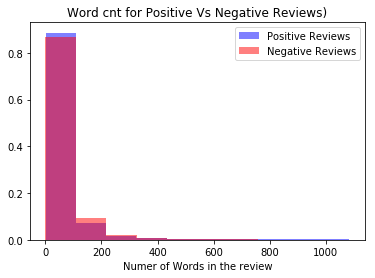

In [29]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
num_bins = 80
#n, bins, patches = plt.hist(comments_word_cnt[:5000], num_bins, facecolor='blue', alpha=0.5, label='Positive Reviews')
#n, bins, patches = plt.hist(comments_word_cnt[5000:], num_bins, facecolor='red', alpha=0.5,label='Negative Reviews')
x=comments_word_cnt[:5000]
y=comments_word_cnt[5000:]
np.ones(len(x)) / len(x)
plt.hist(x, weights=np.ones(len(x)) / len(x),  facecolor='blue', alpha=0.5, label='Positive Reviews')
plt.hist(y, weights=np.ones(len(y)) / len(y),  facecolor='red', alpha=0.5,label='Negative Reviews')
plt.title('Word cnt for Positive Vs Negative Reviews)')
plt.xlabel('Numer of Words in the review')
plt.legend()
plt.show()

<font color=green>画了一个正负 review 的 histogram，通过这个图可以看出，正的review 在字数少的bin里面百分比稍微多了一点点
所以正面的review 相对来说比较短，负面的稍微长一些,但是差别没有那么明显。
<font>

### 4. 把文本转换成向量
> 预处理好文本之后，我们就需要把它转换成向量形式，这里我们使用tf-idf的方法。 sklearn自带此功能，直接调用即可。输入就是若干个文本，输出就是每个文本的tf-idf向量。详细的使用说明可以在这里找到： 参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html  这里需要特别注意的一点是：对于训练数据调用fit_transform, 也就是训练的过程。 但对于测试数据，不能再做训练，而是直接使用已经训练好的object做transform操作。思考一下为什么要这么做？



In [32]:
# TODO: 利用tf-idf从文本中提取特征,写到数组里面. 
#       参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#prepare the input as cropus format
train_corpus=[]
for i in range(len(train_comments_cleaned)):
    train_corpus.append(' '.join(train_comments_cleaned[i]) )

test_corpus=[]
for i in range(len(test_comments_cleaned)):
    test_corpus.append(' '.join(test_comments_cleaned[i]) )    
print (len(train_corpus), len(test_corpus))


vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_corpus)
y_train =train_labels 
X_test = vectorizer.transform(test_corpus)
y_test =test_labels 

print (np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

8065 2500
(8065, 2851) (2500, 2851) (8065,) (2500,)


### 5. 通过交叉验证来训练模型
> 接下来需要建模了！ 这里我们分别使用逻辑回归，朴素贝叶斯和SVM来训练。针对于每一个方法我们使用交叉验证（gridsearchCV)， 并选出最好的参数组合，然后最后在测试数据上做验证。 这部分已经在第二次作业中讲过。

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params_c = np.logspace(-4, 1, 11)
parameter_grid = {'C': params_c}
model= LogisticRegression()

In [34]:

# TODO： 利用逻辑回归来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       逻辑回归的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       对于逻辑回归，经常调整的超参数为： C
%time
grid_search = GridSearchCV(model,
                           param_grid=parameter_grid,
                           cv=4, n_jobs=5, scoring='f1')
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

Wall time: 0 ns
Best parameters: {'C': 0.0001}


In [35]:
print (grid_search.best_estimator_)
print()
print (grid_search.best_score_)
print()
print (grid_search.grid_scores_)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

0.7654037421397959

[mean: 0.76540, std: 0.00010, params: {'C': 0.0001}, mean: 0.76540, std: 0.00010, params: {'C': 0.00031622776601683794}, mean: 0.76540, std: 0.00010, params: {'C': 0.001}, mean: 0.76540, std: 0.00010, params: {'C': 0.0031622776601683794}, mean: 0.76540, std: 0.00010, params: {'C': 0.01}, mean: 0.76527, std: 0.00021, params: {'C': 0.03162277660168379}, mean: 0.76481, std: 0.00138, params: {'C': 0.1}, mean: 0.76273, std: 0.00335, params: {'C': 0.31622776601683794}, mean: 0.75801, std: 0.00148, params: {'C': 1.0}, mean: 0.74787, std: 0.00250, params: {'C': 3.1622776601683795}, mean: 0.74351, std: 0.00384, params: {'C': 10.0}]


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [425]:
from sklearn.metrics import classification_report
y_train_predict = grid_search.predict(X_train)
print (classification_report(y_train, y_train_predict,digits=4 ))

             precision    recall  f1-score   support

          0     0.9030    0.7044    0.7914      3065
          1     0.8403    0.9536    0.8934      5000

avg / total     0.8641    0.8589    0.8546      8065



### 3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）

In [424]:
from sklearn.metrics import classification_report
y_test_predict = grid_search.predict(X_test)
print (classification_report(y_test, y_test_predict,digits=4 ))

             precision    recall  f1-score   support

          0     0.8513    0.5360    0.6578      1250
          1     0.6614    0.9064    0.7648      1250

avg / total     0.7564    0.7212    0.7113      2500



In [442]:
from sklearn.Se import MultinomialNB
# TODO： 利用朴素贝叶斯来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       朴素贝叶斯的使用方法请参考：https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
#       对于朴素贝叶斯，一般不太需要超参数的调节。但如果想调参，也可以参考上面的链接，有几个参数是可以调节的。 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)
print (classification_report(y_test, y_test_predict,digits=4 ))


             precision    recall  f1-score   support

          0     0.9085    0.3176    0.4707      1250
          1     0.5865    0.9680    0.7305      1250

avg / total     0.7475    0.6428    0.6006      2500



In [449]:
from sklearn import svm
# TODO： 利用SVM来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel。 这里的参数C跟逻辑回归是一样的， gamma和kernel是针对于SVM的参数
#       在这里先不要考虑他们的含义（或者通过官方文档试图理解一下）， 在课程最后的部分会讲到这些内容。 
from sklearn.svm import SVC
params_c = np.logspace(-4, 1, 11)
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
parameter_grid = {'C': params_c,
                'kernel': kernel_list}
model = SVC()
%time
grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=4, n_jobs=5, scoring='f1')
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 9.3 µs
Best parameters: {'C': 1.0, 'kernel': 'linear'}


In [459]:
print (grid_search.best_estimator_)
print (grid_search.best_score_)
#print (grid_search.grid_scores_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8173056135779905


In [458]:
#score from train set
from sklearn.metrics import classification_report
y_train_predict = grid_search.predict(X_train)
print (classification_report(y_train, y_train_predict,digits=4 ))

             precision    recall  f1-score   support

          0     0.9414    0.8232    0.8783      3065
          1     0.8994    0.9686    0.9327      5000

avg / total     0.9153    0.9133    0.9120      8065



In [460]:
#score  from test set
from sklearn.metrics import classification_report
y_test_predict = grid_search.predict(X_test)
print (classification_report(y_test, y_test_predict,digits=4 ))

             precision    recall  f1-score   support

          0     0.8297    0.5728    0.6777      1250
          1     0.6738    0.8824    0.7641      1250

avg / total     0.7517    0.7276    0.7209      2500



> 对于超参数的调整，我们经常使用gridsearch，这也是工业界最常用的方法，但它的缺点是需要大量的计算，所以近年来这方面的研究也成为了重点。 其中一个比较经典的成果为Bayesian Optimization（利用贝叶斯的思路去寻找最好的超参数）。Ryan P. Adams主导的Bayesian Optimization利用高斯过程作为后验概率（posteior distribution）来寻找最优解。 https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf 在下面的练习中，我们尝试使用Bayesian Optimization工具来去寻找最优的超参数。参考工具：https://github.com/fmfn/BayesianOptimization  感兴趣的朋友可以去研究一下。 

### 6. 思考题 
1. 对于情感分析来说，有一个问题也很重要，比如一个句子里出现了 “我不太兴奋”， “不是很满意”。 在这种情况，因为句子中出现了一些积极的词汇很可能被算法识别成正面的，但由于前面有一个“不”这种关键词，所以否定+肯定=否定，算法中这种情况也需要考虑。另外，否定+否定=肯定， 这种情况也一样。 
2. 另外一个问题是aspect-based sentiment analysis, 这个指的是做情感分析的时候，我们既想了解情感，也想了解特定的方面。 举个例子： “这部手机的电池性能不错，但摄像不够清晰啊!”, 分析完之后可以得到的结论是： “电池：正面， 摄像：负面”， 也就是针对于一个产品的每一个性能做判定，这种问题我们叫做aspect-based sentiment analysis，也是传统情感分析的延伸。

>``Q``: 对于如上两个问题，有什么解决方案？ 大概列一下能想到的处理方案。 用简介的文字来描述即可。 

// 你的答案在这里.......
1. 在不后面的词，word2vec转换的时候要调整里面的数字，变成（1-原来的数字）？

2.找出句子中含有转折词的“但是”，“尽管”，然后划分成两个句子来处理








### 7. 其他领域（仅供参考）
跟情感分析类似的领域有叫affective computing, 也就是用来识别情绪(emotion recognition)。但情感和情绪又不太一样，情绪指的是高兴，低落，失落，兴奋这些人的情绪。我们知道真正的人工智能是需要读懂人类的情绪的。而且情绪识别有很多场景，比如服务机器人根据不同的情绪来跟用户交流； 无人驾驶里通过识别用户的情绪（摄像头或者声音或者传感器）来保证安全驾驶； IOT领域里设备也需要读懂我们的情绪； 微博里通过文本读懂每个人发文时的情绪。 

总体来讲，情绪识别跟情感识别所用到的技术是类似的，感兴趣的小伙伴，也可以关注一下这个领域。 如果想发论文，强烈建议选择情绪方面的，不建议选择情感分析，因为问题太老了。情绪分析是近几年才开始受关注的领域。 

<font color=#FF0000 size=4 face="黑体"> 很棒，超出作业完成设计，期待你的坚持</font>